# Project: FBI Gun Data Exploration and Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

* In this project, we will analyze data from the FBI's National Instant Criminal Background Check System, which is used to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase.


* **Questions to answer in the analysis:**
    * **Is there a correlation between poulation size and gun purchase per capita?**
    * **What states were in the top 10 states in gun purchase per capita both in 2010 and 2016?**
    * **What is the overall gun purchasing trend?**

In [1]:
# Import the packages that will be needed in this analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define some setting
pd.set_option('display.max_columns', None)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams['axes.titlesize'] = 16

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Import the data files
url1 = 'https://raw.githubusercontent.com/Fawzy-Almatary/Portfolio-Projects/main/FBI_Gun_Data/US_Census_Data.csv'
url2 = "https://raw.githubusercontent.com/Fawzy-Almatary/Portfolio-Projects/main/FBI_Gun_Data/gun_data.xlsx"

df_census_original = pd.read_csv(url1)
df_gun_original = pd.read_excel(url2)

# Make a copy of the data just in case we needed the original unedited version
df_census = df_census_original.copy()
df_gun = df_gun_original.copy()

In [3]:
# Have a look at the census data

print(f"Shape of data is {df_census.shape[0]} rows and {df_census.shape[1]} columns.\n\n") 
df_census.info()
df_census.sample(3, random_state=5)

Shape of data is 85 rows and 52 columns.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas       

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
71,Fact Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,"Female persons, percent, July 1, 2016, (V2016)",NaN,51.60%,47.70%,50.30%,50.90%,50.30%,49.70%,51.20%,51.60%,51.10%,51.30%,49.80%,49.90%,50.90%,50.70%,50.30%,50.20%,50.70%,51.10%,51.00%,51.60%,51.50%,50.80%,50.20%,51.50%,50.90%,49.70%,50.20%,49.90%,50.50%,51.20%,0.505,0.514,0.514,0.487,0.51,0.505,0.505,0.51,0.514,0.515,0.496,0.512,50.40%,49.70%,50.60%,50.80%,50.00%,50.50%,50.30%,48.90%
28,"Median gross rent, 2011-2015",NaN,$717,"$1,146",$913,$677,"$1,255","$1,002","$1,075","$1,018","$1,002",$879,"$1,438",$743,$907,$745,$697,$757,$675,$788,$777,"$1,230","$1,102",$783,$848,$717,$746,$711,$726,$973,"$1,000","$1,192",777,1132,797,709,730,727,907,840,925,790,655,764,$882,$887,$895,"$1,116","$1,014",$643,$776,$789


In [4]:
# Have a look at the gun data

print(f"Shape of data is {df_gun.shape[0]} rows and {df_gun.shape[1]} columns.\n\n") 
df_gun.sample(3, random_state=5)

Shape of data is 12485 rows and 27 columns.




,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
9597,2003-03,Missouri,0.0,NaN,3462.0,11799.0,NaN,124,0.0,3.0,13.0,NaN,169.0,1417.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16987
628,2016-10,Massachusetts,8761.0,4.0,6415.0,3680.0,344.0,198,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,38.0,38.0,13.0,2.0,1.0,1.0,19500
2049,2014-08,Illinois,62282.0,NaN,16532.0,12191.0,0.0,716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,91721


### Data Cleaning

#### Let's start with the census data

In [5]:
# We  will transpose our data to make it more practical
df_census.drop('Fact Note',axis=1, inplace=True)
df_census = df_census.set_index('Fact').T.reset_index()
df_census.rename(columns={'index':'state'}, inplace=True)
df_census.sample(3, random_state=5)

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,NaN,NOTE: FIPS Code values are enclosed in quotes to ensure leading zeros remain intact.,NaN,Value Notes,1,NaN,Fact Notes,(a),(b),(c),NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
42,Texas,"27,862,596","25,146,100",10.80%,"25,145,561",7.20%,7.70%,26.20%,27.30%,12.00%,10.30%,50.40%,50.40%,79.40%,12.60%,1.00%,4.80%,0.10%,1.90%,39.10%,42.60%,"1,539,655",16.60%,"10,753,629","9,977,436",62.20%,"$136,000","$1,432",$460,$882,"165,853","9,149,196",2.84,83.30%,35.00%,81.90%,27.60%,8.10%,18.60%,64.30%,57.70%,"54,480,811","145,035,130","702,603,073","691,242,607","356,116,376","$13,666",25.6,"$53,207","$26,999",15.60%,"569,091","10,239,710","521,095,797",3.20%,"2,205,149","2,356,748","1,251,696","866,678","1,070,392","1,224,845","213,590","2,057,218",96.3,"261,231.71","""48""",NaN,NaN,NaN,NaN,NaN,Na

In [6]:
# Many columns appear to only null values, so we will remove them and have a new look at our transposed data with no null values
df_census.dropna(axis=1, how='any', inplace=True)
df_census.sample(3, random_state=10)

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
37,Pennsylvania,12784227,12702857,0.006,12702379,0.056,0.057,0.209,0.22,0.174,0.154,0.51,0.513,0.824,0.118,0.004,0.035,0.001,0.019,0.07,0.77,870770,0.063,5612002,5567315,0.692,166000,1425,498,840,23303,4958859,2.49,0.88,0.106,0.892,0.286,0.095,0.067,0.628,0.583,23504192,96329248,231396178,191170147,178794945,14008,26.3,53599,29291,0.129,299695,5306896,257626942,0.01,811890,975453,579400,304803,131512,818858,97969,837792,283.9,44742.7,"""42"""
23,Mississippi,"2,988,726","2,968,103",0.70%,"2,967,297",6.30%,7.10%,24.10%,25.50%,15.10%,12.80%,51.50%,51.40%,59.30%,37.70%,0.60%,1.10%,0.10%,1.20%,3.10%,56.90%,"184,774",2.30%,"1,307,441","1,274,719",68.40%,"$103,100","$1,077",$341,$717,"6,886","1,096,593",2.64,86.10%,3.90%,82.30%,20.70%,11.90%,13.90%,57.50%,53.70%,"6,999,175","16,630,58

In [7]:
# Have a look at the census data after editing it
print(f"Shape of data is {df_census.shape[0]} rows and {df_census.shape[1]} columns,.\nThere are {df_census.isnull().sum().sum()} null values in the data.\n\n") 
df_census.info()
df_census.sample(3, random_state=15)

Shape of data is 50 rows and 66 columns,.
There are 0 null values in the data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 66 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   state                                                                                   50 non-null     object
 1   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     object
 2   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     object
 3   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     object
 4   Population, Census, April 1, 2010                                                       50 non-null     object
 5  

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
35,Oklahoma,3923561,3751615,0.046,3751351,0.068,0.07,0.245,0.248,0.15,0.135,0.505,0.505,0.746,0.078,0.092,0.022,0.002,0.061,0.103,0.662,295847,0.058,1721045,1664378,0.661,117900,1147,370,727,12092,1455321,2.57,0.826,0.098,0.869,0.241,0.113,0.161,0.611,0.557,7121153,22795438,74295394,71892946,50256231,13174,21.3,46879,25032,0.163,93093,1370988,59124620,0.008,276218,327229,174395,105168,64875,249027,36273,273491,54.7,68594.92,"""40"""
37,Pennsylvania,12784227,12702857,0.006,12702379,0.056,0.057,0.209,0.22,0.174,0.154,0.51,0.513,0.824,0.118,0.004,0.035,0.001,0.019,0.07,0.77,870770,0.063,5612002,5567315,0.692,166000,1425,498,840,23303,4958859,2.49,0.88,0.106,0.892,0.286,0.095,0.067,0.628,0.583,23504192,96329248,231396178,191170147,178794945,14008,26.3,53599,29291,0.129,299695,53068

#### Now, we will clean the gun data

In [8]:
# Change month column to time column instead of string
df_gun['month'] = pd.to_datetime(df_gun['month'] , errors='coerce')

In [9]:
# See which staates are in gun data but not census data
list_gun_status = df_gun.groupby('state').sum().index
list_census_status = df_census.groupby('state').sum().index

list_difference = []
for state in list_gun_status:
    if state not in list_census_status:
        list_difference.append(state)

list_difference

['District of Columbia',
 'Guam',
 'Mariana Islands',
 'Puerto Rico',
 'Virgin Islands']

<a id='eda'></a>
## Exploratory Data Analysis

#### Question 1: Is there a correlation between poulation size and gun purchase per capita?

In [10]:
# Merge the two tables to calculate the total gun purchases per capita in each state in 2010 and 2016

df_census_populations = df_census[['state', 'Population estimates base, April 1, 2010,  (V2016)', 'Population, Census, April 1, 2010']].copy()
df_census_populations.rename(columns={'Population estimates base, April 1, 2010,  (V2016)': '2016', 'Population, Census, April 1, 2010':'2010'}, inplace=True)
df_census_populations = pd.melt(df_census_populations, id_vars='state', var_name='year', value_name='population')
df_census_populations['year'] = df_census_populations['year'].astype('int64')
df_census_populations['population'] = df_census_populations['population'].replace(",","", regex=True).astype('int64')

df_gun_yearly = df_gun[['state', 'month', 'totals']].copy()
df_gun_yearly['year'] = df_gun_yearly['month'].dt.year
df_gun_yearly.drop('month', axis = 1, inplace=True)
df_gun_yearly = df_gun_yearly[(df_gun_yearly['year'] == 2010) | (df_gun_yearly['year'] == 2016)]
df_gun_yearly_grouped = df_gun_yearly.groupby(['state', 'year'])['totals'].sum().reset_index()
df_gun_yearly_grouped

merged_df = df_census_populations.merge(df_gun_yearly_grouped, on=['state', 'year'])
merged_df['totalsperpop'] = merged_df['totals'] / merged_df['population'] * 100
merged_df

,state,year,population,totals,totalsperpop
0,Alabama,2016,4780131,616947,12.906487
1,Alaska,2016,710249,87647,12.340320
2,Arizona,2016,6392301,416279,6.512193
3,Arkansas,2016,2916025,266014,9.122487
4,California,2016,37254522,2377167,6.380882
...,...,...,...,...,...
95,Virginia,2010,8001024,320783,4.009274
96,Washington,2010,6724540,335342,4.986839
97,West Virginia,2010,1852994,159550,8.610389
98,Wisconsin,2010,5686986,194797,3.425312


In [11]:
# Some statistical data regarding gun purchasing per capita

def corr(data, col1, col2):
    '''
    This get the correlation between two columns.
    It needs three parameters: the name of the dataframe, the first column, the second column.
    It outputs the correlation.
    '''
    r = "{:.2f}".format(data[col1].corr(data[col2]))
    return r


merged2010 = merged_df[merged_df['year'] == 2010]
merged2016 = merged_df[merged_df['year'] == 2016]

total_purchases2010 = "{:,.0f}".format(merged2010['totals'].sum())
total_purchases2016 = "{:,.0f}".format(merged2016['totals'].sum())

corr2010 = corr(merged2010, 'population', 'totalsperpop')
corr2016 = corr(merged2016, 'population', 'totalsperpop')


print(f"The total gun puchases in 2010 was {total_purchases2010} and in 2016 was {total_purchases2016}.\n\
The correlation between population size and total gun purchase in 2010 was {corr2010} and in 2016 was {corr2016}.")

The total gun puchases in 2010 was 14,309,926 and in 2016 was 27,405,549.
The correlation between population size and total gun purchase in 2010 was -0.16 and in 2016 was -0.10.


In [12]:
merged_df

,state,year,population,totals,totalsperpop
0,Alabama,2016,4780131,616947,12.906487
1,Alaska,2016,710249,87647,12.340320
2,Arizona,2016,6392301,416279,6.512193
3,Arkansas,2016,2916025,266014,9.122487
4,California,2016,37254522,2377167,6.380882
...,...,...,...,...,...
95,Virginia,2010,8001024,320783,4.009274
96,Washington,2010,6724540,335342,4.986839
97,West Virginia,2010,1852994,159550,8.610389
98,Wisconsin,2010,5686986,194797,3.425312


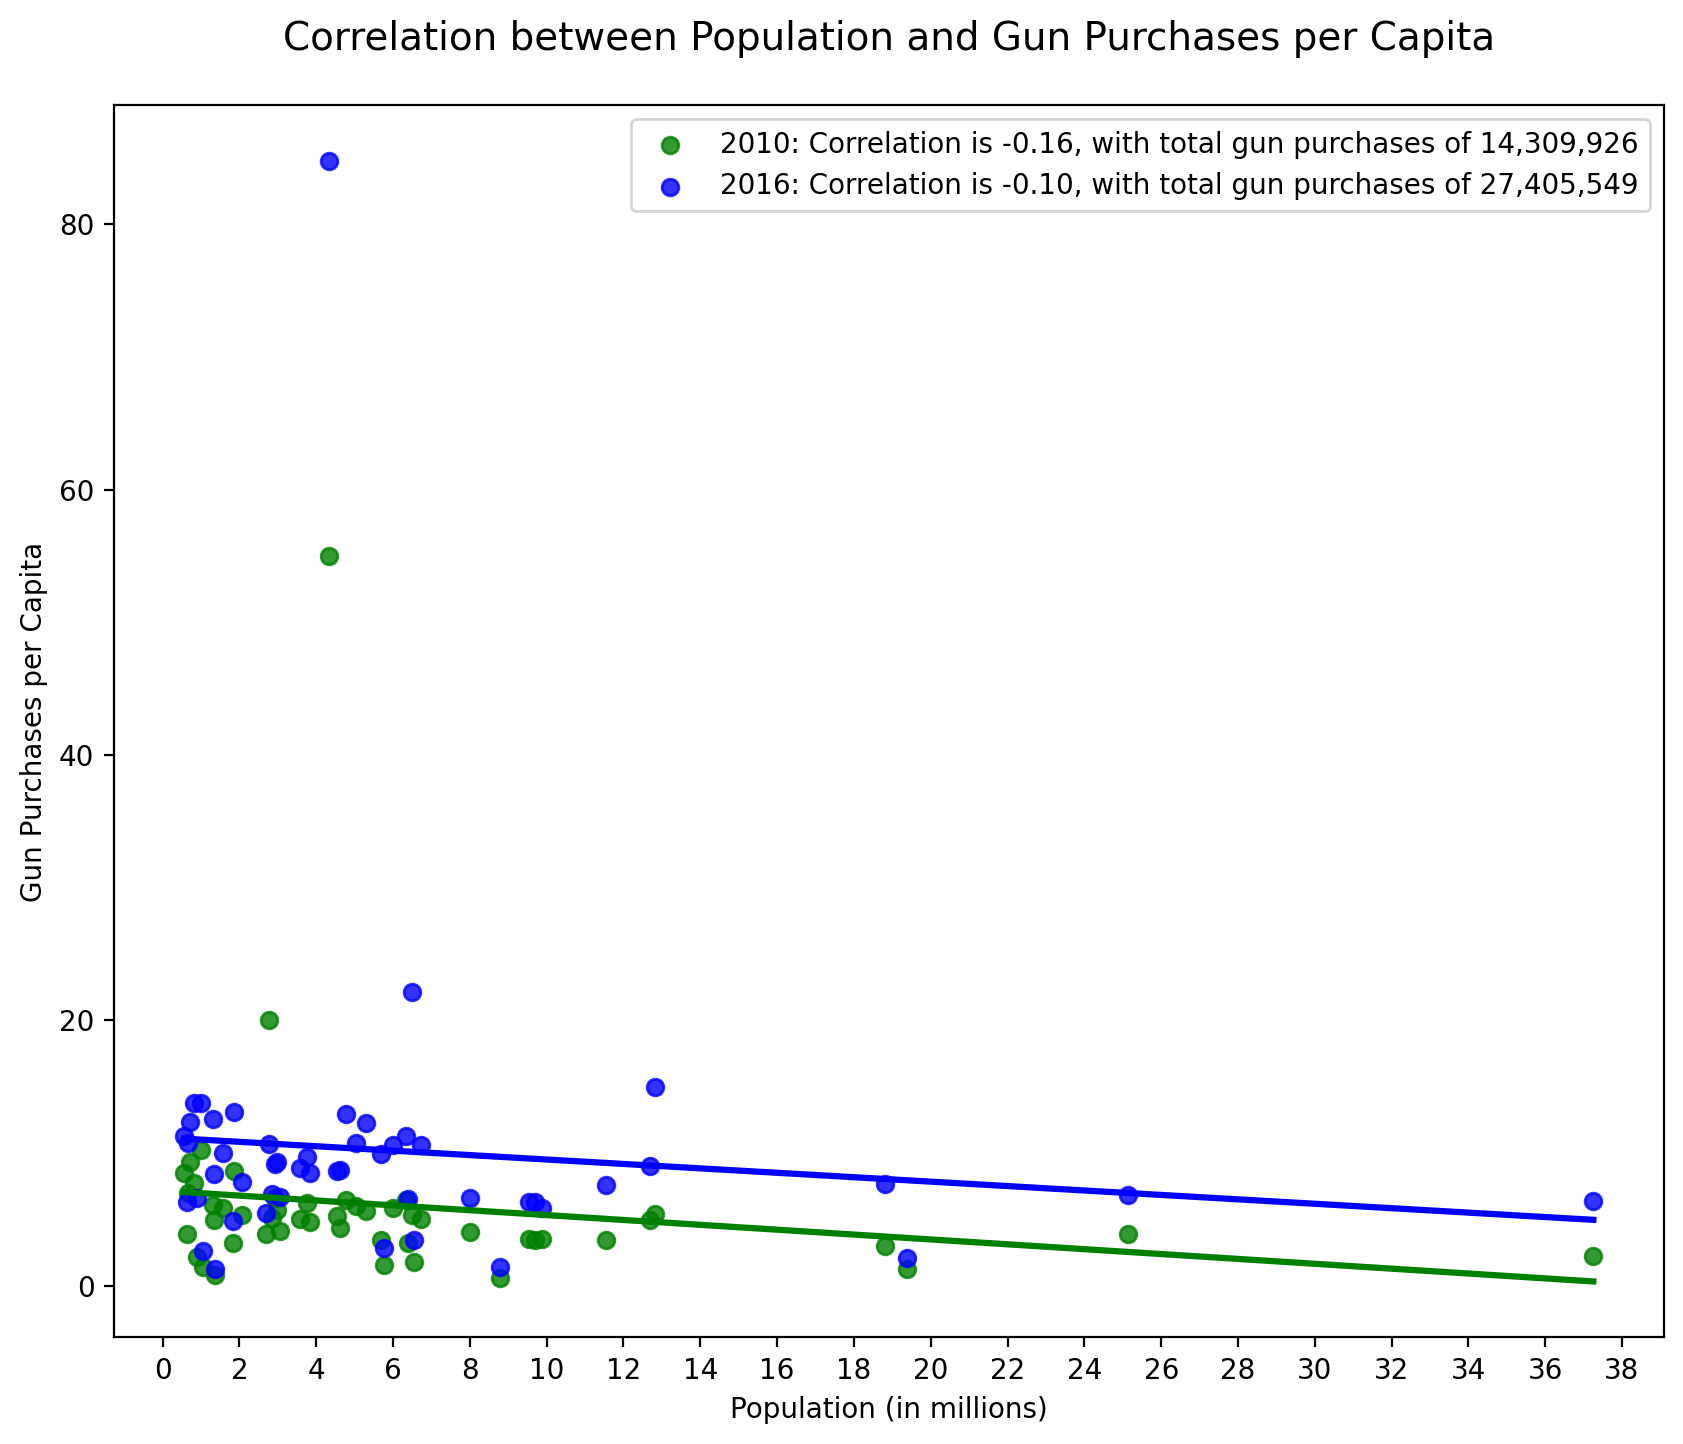

In [13]:
# Plotting the correlation between population size and total gun purchasing per capita

fig, ax = plt.subplots()
sns.regplot(data = merged2010, x='population', y='totalsperpop', ax=ax,\
            ci=None, color='green', label=f"2010: Correlation is {corr2010}, with total gun purchases of {total_purchases2010}")
sns.regplot(data = merged2016, x='population', y='totalsperpop', ax=ax,\
            ci=None, color='blue', label=f"2016: Correlation is {corr2016}, with total gun purchases of {total_purchases2016}")

ax.set(xticks=range(0,40000000,2000000), xticklabels=range(0,40,2))

ax.set_title('Correlation between Population and Gun Purchases per Capita', fontsize=14, pad=20)
ax.set_ylabel('Gun Purchases per Capita')
ax.set_xlabel('Population (in millions)')

plt.legend()
plt.show()

> This graph shows that the correlation between population size and total gun purchasing per capita for both 2010 and 2016.
<br><br>
> In both years, the correlation is weak negative correlation, meaning that with the increase of the population size, total gun purchasing per capita is suspected to decrease a little bit. That is true for both 2010 and 2016.

### Question 2: What states were in the top 10 states in gun purchase per capita both in 2010 and 2016?

In [14]:
# Getting which states were in the two 10 states in gun purchase per capita both in 2010 and 2016

top2010 = merged2010.sort_values('totalsperpop', ascending=False).iloc[:10].set_index('state').index
top2016 = merged2016.sort_values('totalsperpop', ascending=False).iloc[:10].set_index('state').index

top10inboth = []
for state in top2010:
    if state in top2016:
        top10inboth.append(state)

top10inboth

['Kentucky', 'Montana', 'Alaska', 'West Virginia', 'South Dakota']

### Question 3: What is the overall gun purchasing trend?

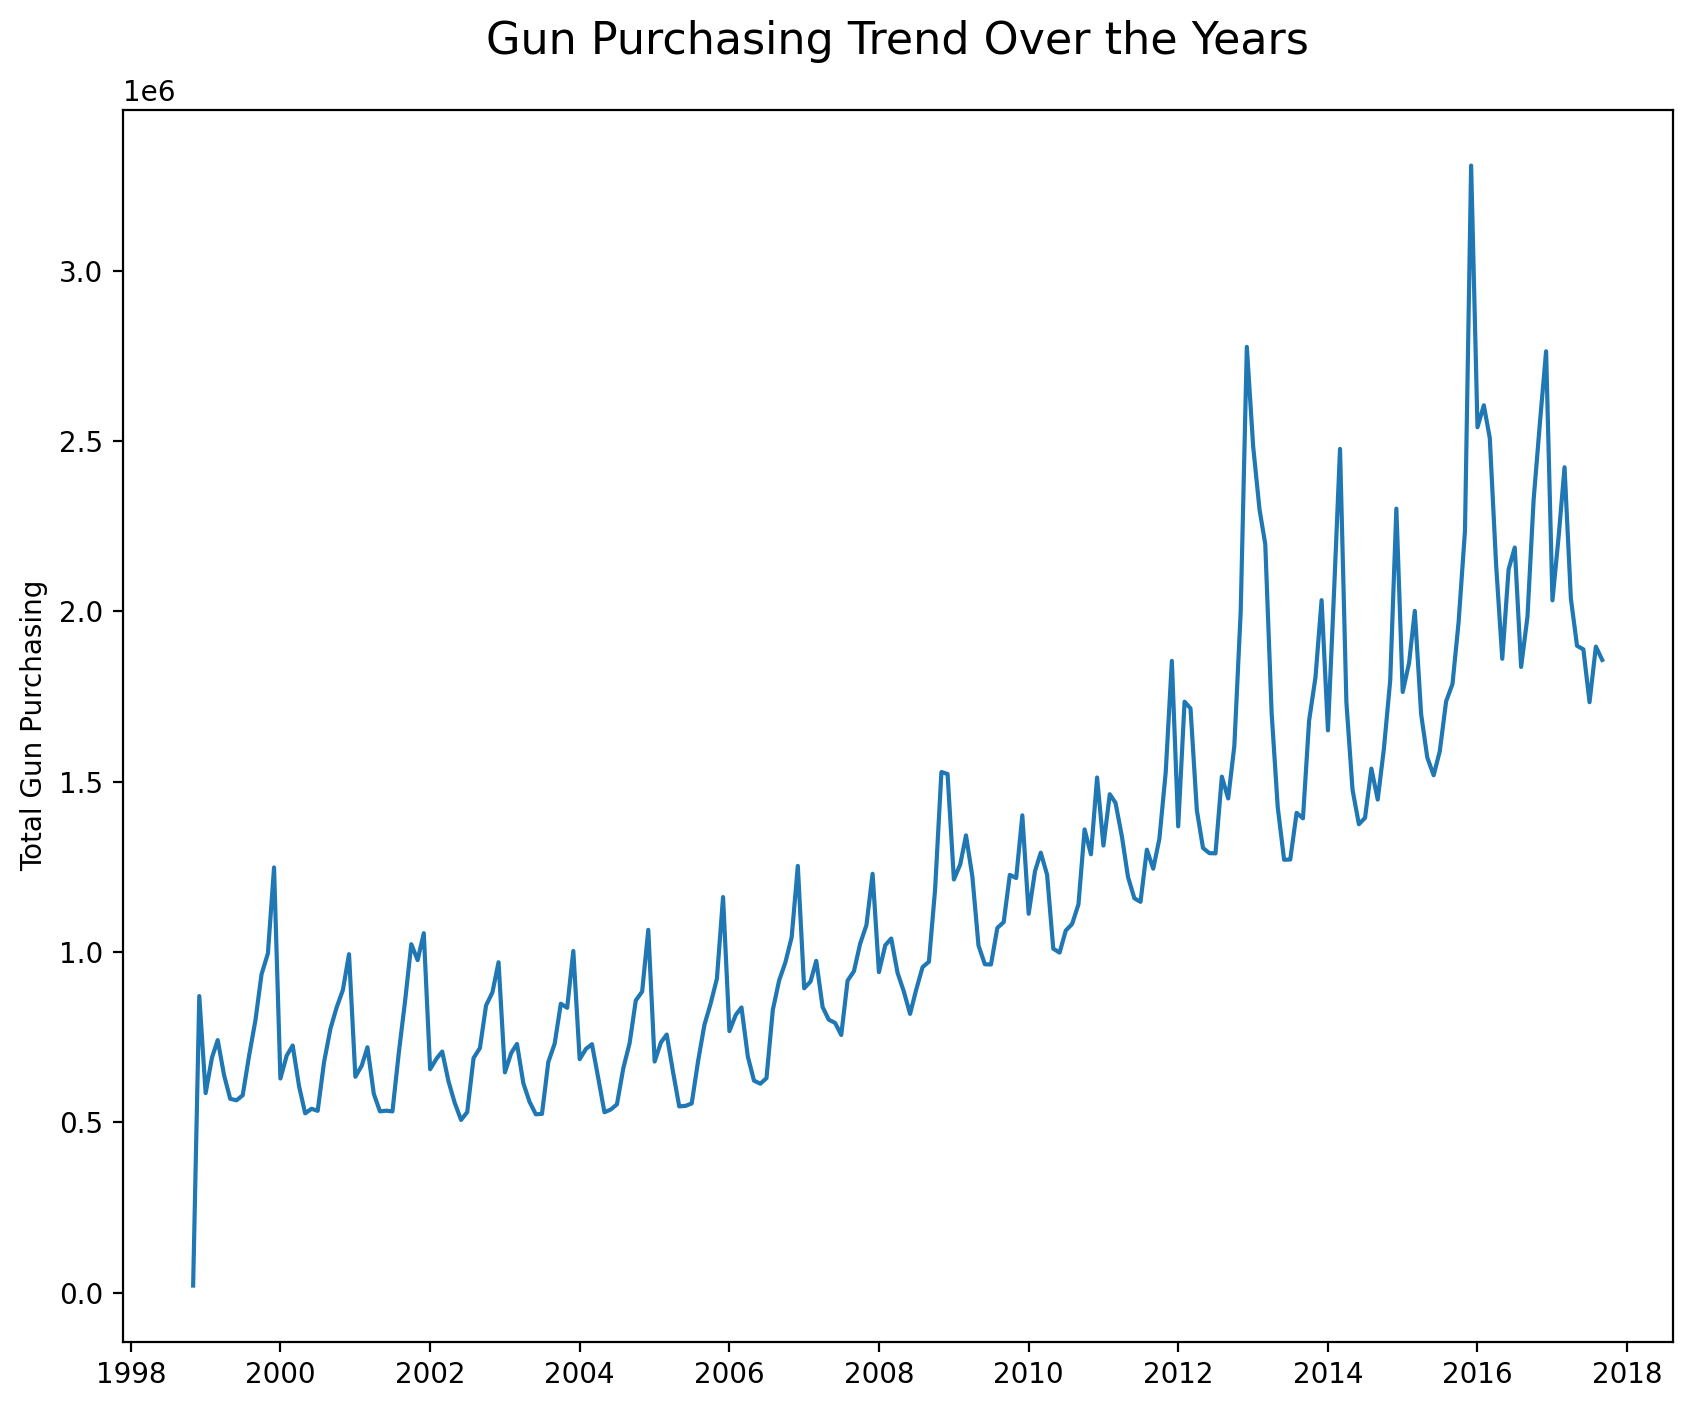

In [15]:
# Looking at the trend of gun purchasing over the years
df_gun_grouped = df_gun.groupby(['month'])['totals'].sum().reset_index()

sns.lineplot(data=df_gun_grouped, x='month', y='totals')
plt.title('Gun Purchasing Trend Over the Years', pad=20)
plt.xlabel(xlabel=None)
plt.ylabel(ylabel='Total Gun Purchasing')
plt.show()

> This graph shows that the total number of purchased guns per year is generally increasing over time.
<br><br>
> The rate of increases seems to get higher starting from 2011, more research is needed to know the reason for that.

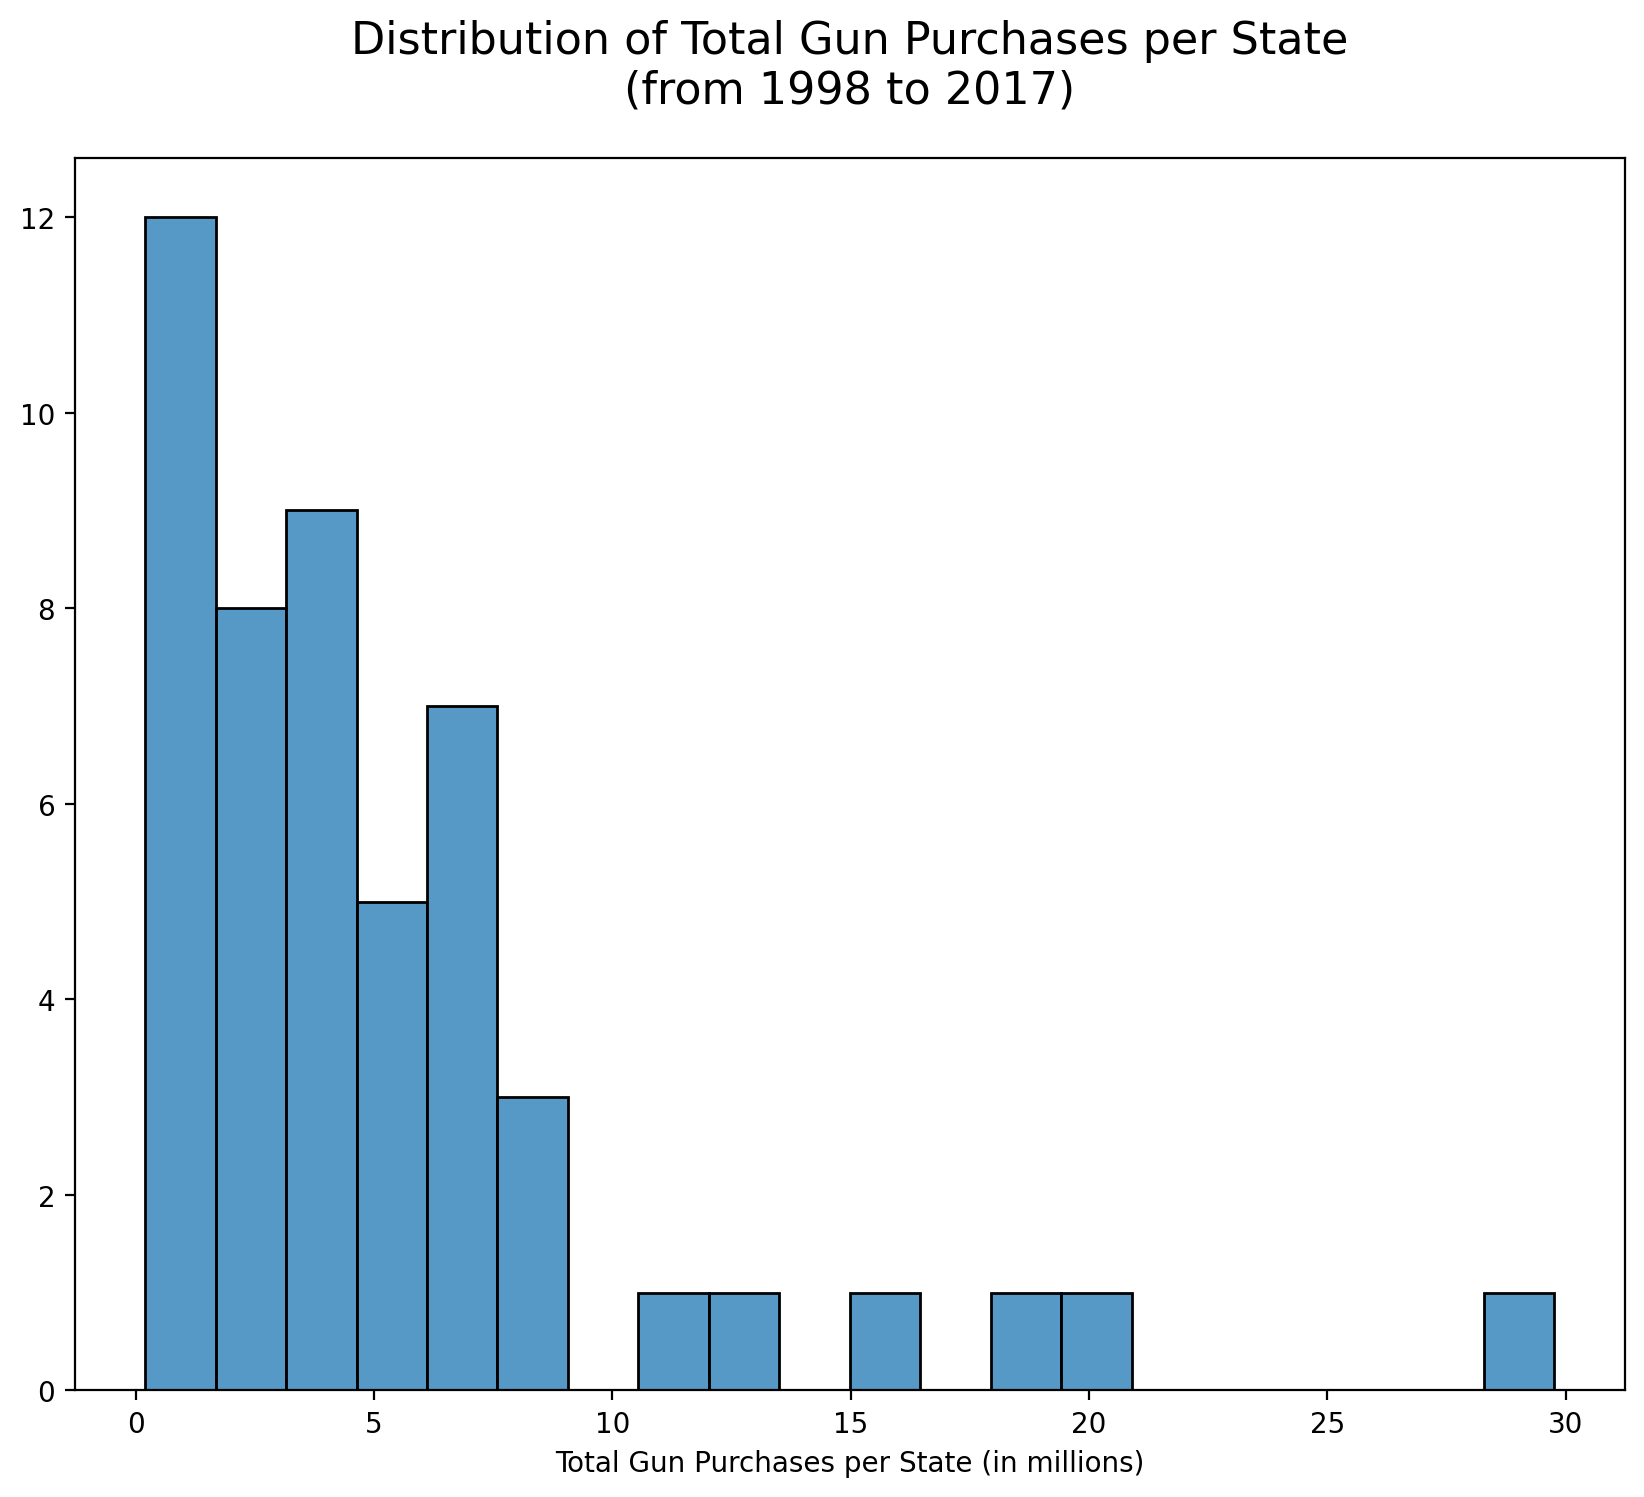

In [16]:
# Plotting the distribution of total gun purchases per state

df_gun_state = df_gun[~df_gun['state'].isin(list_difference)].copy()
df_gun_state = df_gun_state.groupby('state')['totals'].sum().reset_index()

sns.histplot(data=df_gun_state, x='totals', bins=20).set(xticks=range(0,35000000,5000000), xticklabels=range(0,35,5))

plt.title('Distribution of Total Gun Purchases per State\n(from 1998 to 2017)', pad=20)
plt.xlabel(xlabel='Total Gun Purchases per State (in millions)')
plt.ylabel(ylabel=None)
plt.show()

> This graph shows that most states have a total gun purcashing of less than 10 million.
<br><br>
> Number of states that are has a total gun purcashing of more than 10 million are small that they can be visually counted from the graph, which are six states.

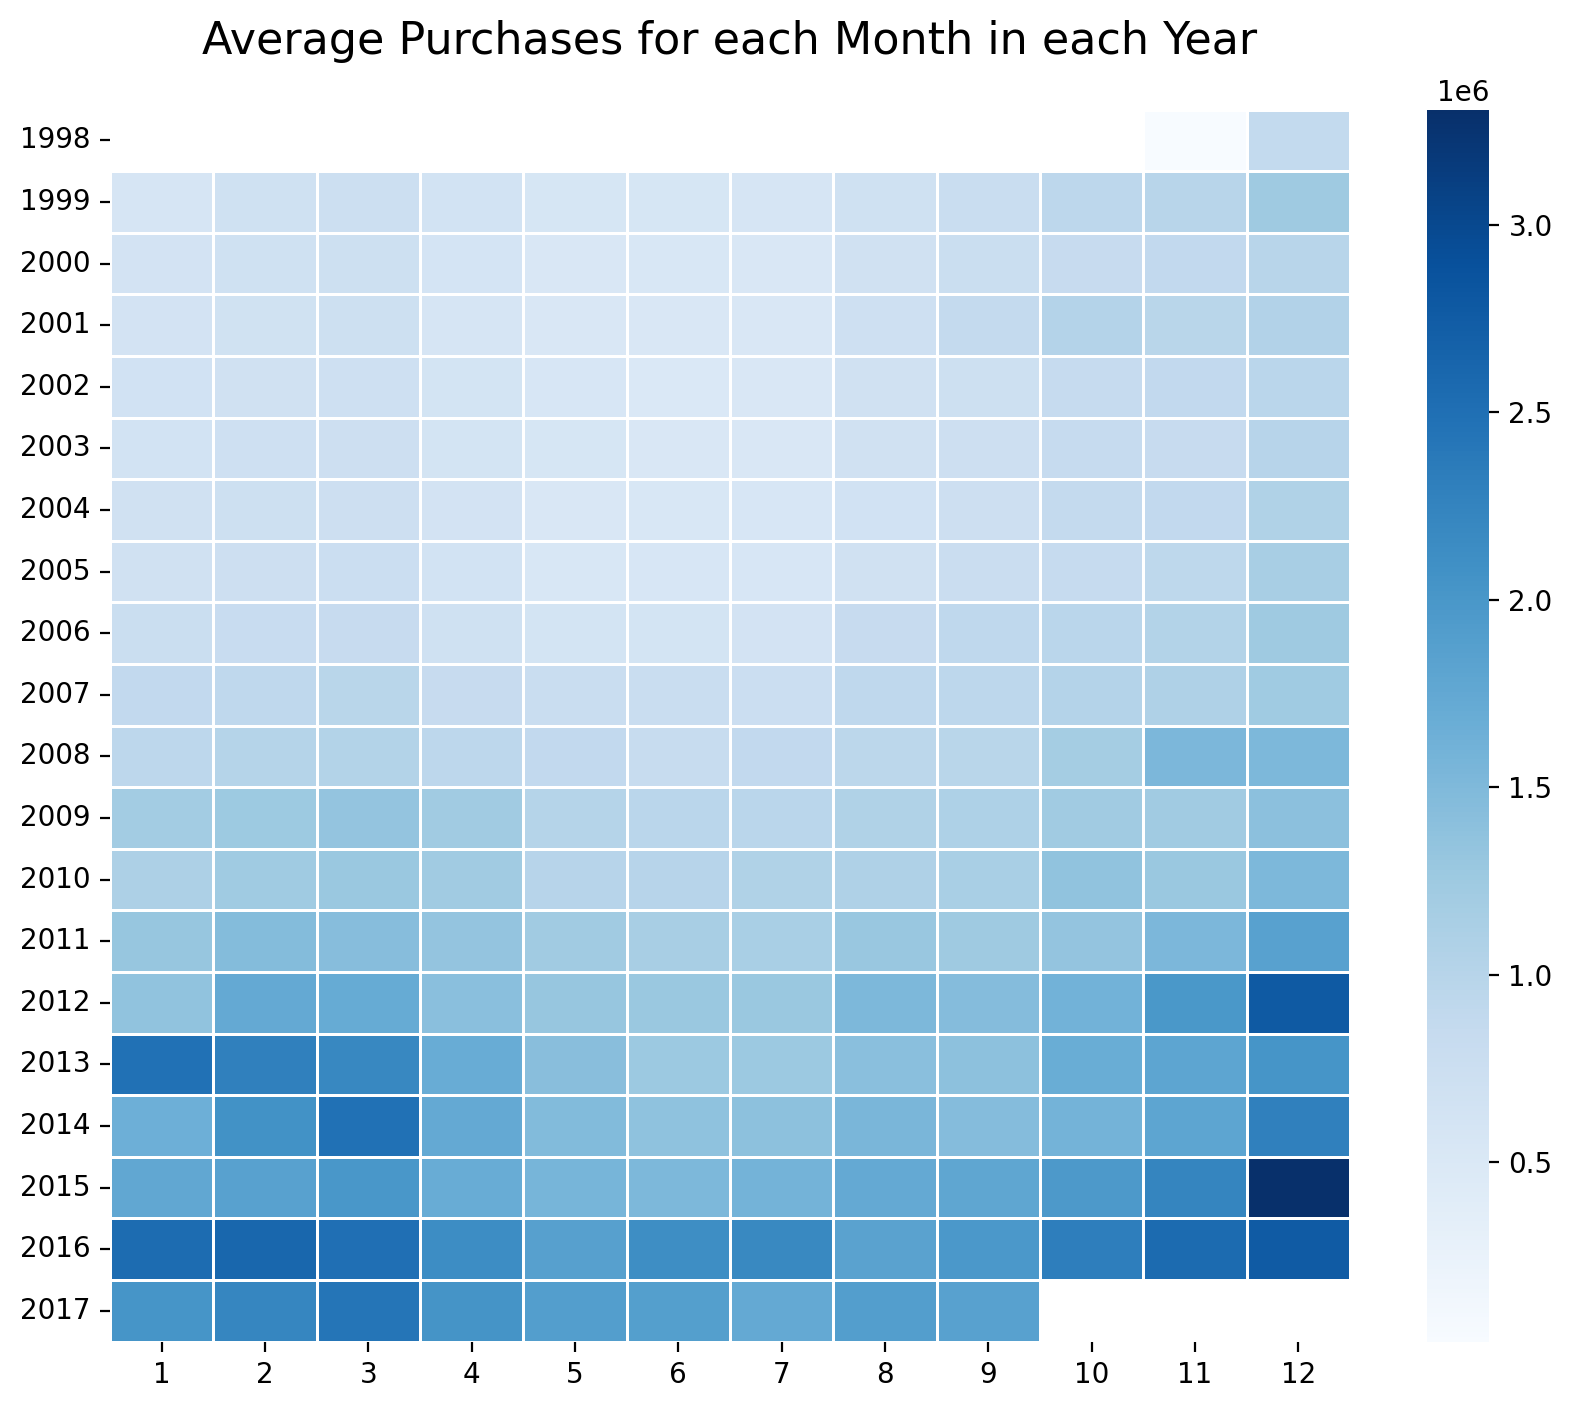

In [17]:
# Plotting a heatmap to see which years or months are more related to purchasing guns

df_gun_box = df_gun[['month', 'totals']].copy()
df_gun_box['year'] = df_gun_box['month'].dt.year
df_gun_box['month'] = df_gun_box['month'].dt.month
df_gun_box = df_gun_box.groupby(['year', 'month'])['totals'].sum().reset_index()
df_gun_box_uniform = df_gun_box.pivot('year', 'month', 'totals')

sns.heatmap(df_gun_box_uniform, linewidths=.5, cmap="Blues")
plt.title('Average Purchases for each Month in each Year', pad=20)
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()

> According to the heatmap, it is more common to urchase guns in winter (from December to March). More research is needed to know the reason.
<br><br>
> The month of the highest gun purchases is December 2015, could the reason for that be the ISIS attacks on Paris on November 2015? More research is needed to either confirm or deny this theory.
<br><br>
> Also, the heatmap confirms the drastic increase in gun purchasing starting from 2012.

<a id='conclusions'></a>
## Conclusions

* __Limitations in this analysis:__
    * Unfortunately, the data set contains only the population of each state in 2010 and 2016, so doing more analysis regarding the correlation between gun purchasing and population over years was not possible.
    * Metadata for gun_data file was incomplete: the definitions of the variables were not provided.which makes it hard to do a good analysis.
    * Some US territories were present in gun_data file but not in the census data, so we had to drop drop them in the gun_data file for consistent analysis. They are: ('District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands').
<br><br>
* __Findings from this analysis:__
    * Sum of total gun purchases almost doubled between 2010 and 2016. In 2010, it was 14,309,926 and in 2016 it was 27,405,549.
    * There is weak negative correlation between population size and total gun purchasing **per capita**. Meaning that with the increase of the population size, total gun purchasing **per capita** is suspected to decrease a little bit. That is true for both 2010 and 2016.
    * Those five states were in the top 10 list of gighest states in total gun purchasing **per capita** in both 2010 and 2016: (Kentucky, Montana, Alaska, West Virginia, South Dakota)
    * Overall, more guns are being purchased ver the years, both in total numbers and in total gun purchasing **per capita**.
    * Most states have a total gun purcashing of less than 10 million, with only six exception.
    * According to the heatmap, it is more common to urchase guns in winter (from December to March). Also, it seems there has been a drastic increase in gun purchasing starting from 2012.